# Insurance Claim Prediction


## Load the data
This section loads the dataset and prints the first 5 entries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline


# Load the provided datasets
data = pd.read_csv('data/train.csv')
claims = data['loss']
features = data.drop(['id','loss'], axis = 1)

print features.head()

  cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10    ...        cont5  \
0    A    B    A    B    A    A    A    A    B     A    ...     0.310061   
1    A    B    A    A    A    A    A    A    B     B    ...     0.885834   
2    A    B    A    A    B    A    A    A    B     B    ...     0.397069   
3    B    B    A    B    A    A    A    A    B     A    ...     0.422268   
4    A    B    A    B    A    A    A    A    B     B    ...     0.704268   

      cont6     cont7    cont8    cont9   cont10    cont11    cont12  \
0  0.718367  0.335060  0.30260  0.67135  0.83510  0.569745  0.594646   
1  0.438917  0.436585  0.60087  0.35127  0.43919  0.338312  0.366307   
2  0.289648  0.315545  0.27320  0.26076  0.32446  0.381398  0.373424   
3  0.440945  0.391128  0.31796  0.32128  0.44467  0.327915  0.321570   
4  0.178193  0.247408  0.24564  0.22089  0.21230  0.204687  0.202213   

     cont13    cont14  
0  0.822493  0.714843  
1  0.611431  0.304496  
2  0.195709  0.774425  
3  0.605077  0

## Explore the Data
To get a better understanding of the provided data, some analysis and visualization is provided.
### Statistical Analysis
This section shall detail some of the statistical properties of the target feature.

In [2]:
#Minimum claim of the data
minimum_claim = np.amin(claims)

#Maximum claim of the data
maximum_claim = np.amax(claims)

#Mean claim of the data
mean_claim = np.mean(claims)

#Median price of the data
median_claim = np.median(claims)

#25% Quantile
percentile_25 = np.percentile(claims, 25)

#50% Percentile
percentile_50 = np.percentile(claims, 50)

#75% Quantile
percentile_75 = np.percentile(claims, 75)

#Standard deviation of the claims in the data
std_claim = np.std(claims)

# Show the calculated statistics
print "Statistics for Insurence claims dataset:\n"
print "Minimum claim: ${:,.2f}".format(minimum_claim)
print "Maximum claim: ${:,.2f}".format(maximum_claim)
print "Mean claim: ${:,.2f}".format(mean_claim)
print "Median claim ${:,.2f}".format(median_claim)
print "25% percentile ${:,.2f}".format(percentile_25)
print "50% percentile ${:,.2f}".format(percentile_50)
print "75% percentile ${:,.2f}".format(percentile_75)
print "Standard deviation of claims: ${:,.2f}".format(std_claim)

Statistics for Insurence claims dataset:

Minimum claim: $0.67
Maximum claim: $121,012.25
Mean claim: $3,037.34
Median claim $2,115.57
25% percentile $1,204.46
50% percentile $2,115.57
75% percentile $3,864.05
Standard deviation of claims: $2,904.08


This information helps to give context to future predictions. Also the Minimum of \$0.67 and Maximum of \$121,012.25, are already showing that some outliers will have to be removed.

### Visualizing the Data

A scatterplot matrix helps to get a better understanding of the data.
For performance reasons, the data is split to only contain the first 500 points. **It might still take a while to compute!**

In [ ]:
scatterdata = data[:500].drop("id", axis = 1)

pd.scatter_matrix(scatterdata, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

One can already see correlations, that can be used to trim down the dataset using feature selection. Most notably are cont11 <-> cont12, which seem to correlate strictly linearly. Some other correlations can also be seen, but not as clearly, like cont1 <-> cont9.

This is the scatterplot matrix over **ALL** the datapoints:

<img src="files/img/scatterplot_all.png">

 It can be produced by the following code:

**THIS WILL TAKE QUITE A LONG TIME**

In [ ]:
#Activate if wished. Again: This will be slow
if False:
    pd.scatter_matrix(data.drop('id', axis = 1), alpha = 0.3, figsize = (14,8), diagonal = 'kde');

The scatterplot matrix also shows the right skewedness of the target feature 'loss':

In [ ]:
claims.plot.kde()

## Preprocessing
### Normalization

The target feature needs to be normalized for the regression model to yield the best results possible.

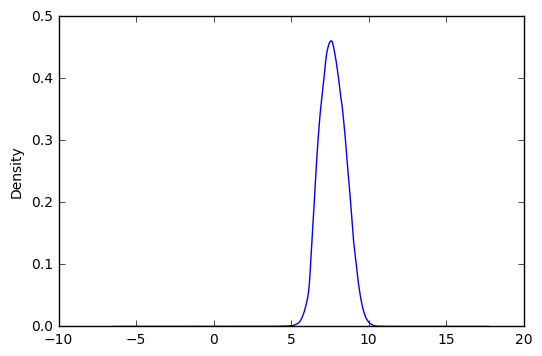

In [3]:
claims_normalized = np.log(claims)

claims_normalized.plot.kde()

The categorical features need to be label encoded and then one hot encoded.

In [4]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
for i in range(1,117):
    key = 'cat' + str(i)
    if key in features.columns:
        features[key] = le.fit_transform(features[key])
    else:
        break
print features.head()
print len(features.columns)

   cat1  cat2  cat3  cat4  cat5  cat6  cat7  cat8  cat9  cat10    ...     \
0     0     1     0     1     0     0     0     0     1      0    ...      
1     0     1     0     0     0     0     0     0     1      1    ...      
2     0     1     0     0     1     0     0     0     1      1    ...      
3     1     1     0     1     0     0     0     0     1      0    ...      
4     0     1     0     1     0     0     0     0     1      1    ...      

      cont5     cont6     cont7    cont8    cont9   cont10    cont11  \
0  0.310061  0.718367  0.335060  0.30260  0.67135  0.83510  0.569745   
1  0.885834  0.438917  0.436585  0.60087  0.35127  0.43919  0.338312   
2  0.397069  0.289648  0.315545  0.27320  0.26076  0.32446  0.381398   
3  0.422268  0.440945  0.391128  0.31796  0.32128  0.44467  0.327915   
4  0.704268  0.178193  0.247408  0.24564  0.22089  0.21230  0.204687   

     cont12    cont13    cont14  
0  0.594646  0.822493  0.714843  
1  0.366307  0.611431  0.304496  
2  0.373

### Outlier Detection

## Creation of Training and Testing Sets

In [12]:
from sklearn.cross_validation import train_test_split

if True:
    size = 10000
else:
    size = None
print size    
X_train, X_test, y_train, y_test = train_test_split(
    features[:size], claims_normalized[:size], test_size=0.25, random_state=1)

10000


## Benchmark

This is the benchmark, the models will compete against.
The benchmark model will always predict the mean of the training set. The performance is measured with the mean absolute error as requested by the Kaggle competition.

In [7]:
from sklearn.metrics import mean_absolute_error

benchMAE = mean_absolute_error(y_test, np.full_like(y_test, mean_claim))
print "The benchmark performance is {:,.3f}".format(benchMAE)

The benchmark performance is 3,029.598


## Model Creation
### Decision Tree Regressor

In [8]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()

clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print mean_absolute_error(y_test, np.exp(pred))

3528.1528396


## SVM

In [13]:
from sklearn import svm
clf = svm.SVR()

clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print mean_absolute_error(y_test, np.exp(pred))

2329.96508347


# NOTES